# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense

%matplotlib inline


Using TensorFlow backend.


## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [2]:
# if you are using google colab
from google.colab import files
files.upload()

Saving daily-minimum-temperatures-in-me.csv to daily-minimum-temperatures-in-me (2).csv


{'daily-minimum-temperatures-in-me.csv': b'Date,Temperature\n1981-01-01,20.7\n1981-01-02,17.9\n1981-01-03,18.8\n1981-01-04,14.6\n1981-01-05,15.8\n1981-01-06,15.8\n1981-01-07,15.8\n1981-01-08,17.4\n1981-01-09,21.8\n1981-01-10,20\n1981-01-11,16.2\n1981-01-12,13.3\n1981-01-13,16.7\n1981-01-14,21.5\n1981-01-15,25\n1981-01-16,20.7\n1981-01-17,20.6\n1981-01-18,24.8\n1981-01-19,17.7\n1981-01-20,15.5\n1981-01-21,18.2\n1981-01-22,12.1\n1981-01-23,14.4\n1981-01-24,16\n1981-01-25,16.5\n1981-01-26,18.7\n1981-01-27,19.4\n1981-01-28,17.2\n1981-01-29,15.5\n1981-01-30,15.1\n1981-01-31,15.4\n1981-02-01,15.3\n1981-02-02,18.8\n1981-02-03,21.9\n1981-02-04,19.9\n1981-02-05,16.6\n1981-02-06,16.8\n1981-02-07,14.6\n1981-02-08,17.1\n1981-02-09,25\n1981-02-10,15\n1981-02-11,13.7\n1981-02-12,13.9\n1981-02-13,18.3\n1981-02-14,22\n1981-02-15,22.1\n1981-02-16,21.2\n1981-02-17,18.4\n1981-02-18,16.6\n1981-02-19,16.1\n1981-02-20,15.7\n1981-02-21,16.6\n1981-02-22,16.5\n1981-02-23,14.4\n1981-02-24,14.4\n1981-02-25,18.5\

In [0]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')

In [4]:
df.shape

(3650, 2)

### Print the data
- First 5 rows only

In [5]:
df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [0]:
df.set_index('Date',drop=True,inplace=True)

In [7]:
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [8]:
df.shape

(3650, 1)

## Question 2

### Check the total count of null values in the data

In [9]:
df.isna().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

## Question 3

### Describe your dataframe
- use describe() method

In [10]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

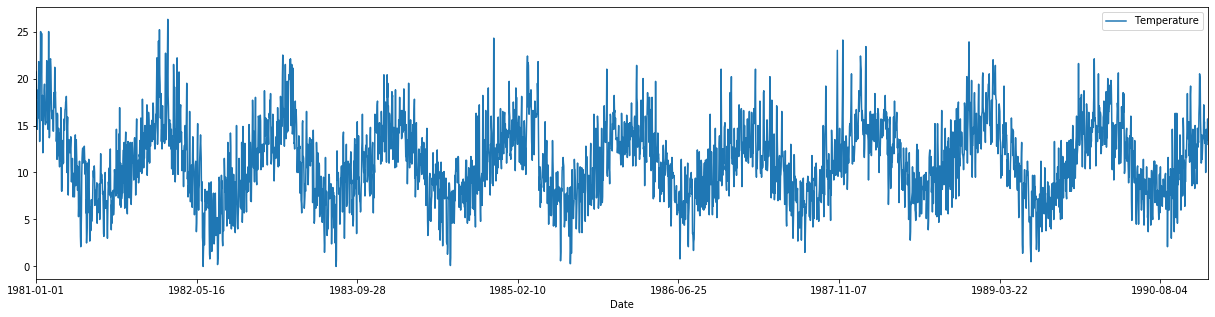

In [11]:
fig,axes = plt.subplots(1,1,figsize=(21,5))
df.plot(ax=axes)
plt.show()

### Get representation of the distribution of data using histogram
- use hist() method

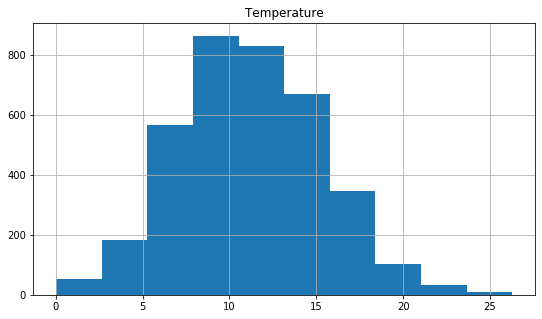

In [12]:
fig,axes = plt.subplots(1,1,figsize=(9,5))
df.hist(ax=axes)
plt.show()

### Check minimum and maximum temperature
- use min() and max() methods

In [13]:
df.max()

Temperature    26.3
dtype: float64

In [14]:
df.min()

Temperature    0.0
dtype: float64

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [15]:
len(df)

3650

In [0]:
x_train = df[:int(df.shape[0]*0.75)]

In [17]:
x_train.shape

(2737, 1)

In [18]:
x_train.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [0]:
x_test = df[int(df.shape[0]*0.75):]

In [20]:
x_test.shape

(913, 1)

In [21]:
x_test.head()

,Temperature
Date,
1988-07-01,6.0
1988-07-02,5.8
1988-07-03,4.9
1988-07-04,5.0
1988-07-05,8.4


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
norm = MinMaxScaler()

In [0]:
x_train_std = norm.fit_transform(x_train)

In [0]:
x_test_std = norm.transform(x_test)

### Print scaled train and test data
- print only first 5 values

In [25]:
x_train_std[:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [26]:
x_test_std[:5]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [0]:
X_train, y_train = create_seq_data(x_train_std)


In [0]:
X_test, y_test = create_seq_data(x_test_std)


### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],1,1))

In [0]:
X_test = np.reshape(X_test,(X_test.shape[0],1,1))

### Print shape of data
- print shape of X_train and X_test

In [32]:
print('Train shape{}{}'.format(X_train.shape,y_train.shape))
print('Test shape{}{}'.format(X_test.shape,y_test.shape))

Train shape(2736, 1, 1)(2736,)
Test shape(912, 1, 1)(912,)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [33]:
model = Sequential()

In [34]:
model.add(LSTM(10,stateful=True, batch_input_shape=(1,1,1),))

In [35]:
model.output

<tf.Tensor 'lstm_1/TensorArrayReadV3:0' shape=(1, 10) dtype=float32>

In [0]:
model.add(Dense(1))

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [37]:
model.compile(optimizer='adam', loss='mse')

### summarize your model
- use summary() method

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [40]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), batch_size=1,epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2736 samples, validate on 912 samples
Epoch 1/50





2736/2736 [==============================] - 6s 2ms/step - loss: 0.0192 - val_loss: 0.0098
Epoch 2/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0126 - val_loss: 0.0107
Epoch 3/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 4/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 5/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 6/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0102 - val_loss: 0.0086
Epoch 7/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 8/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0102 - val_loss: 0.0085
Epoch 9/50
2736/2736 [=============

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
y_train_predicted = model.predict(X_train,batch_size=1)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
y_test_predicted = model.predict(X_test,batch_size=1)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
y_train_inverse = norm.inverse_transform(y_train_predicted)

In [45]:
y_train_inverse[:3]

array([[17.40278  ],
       [15.2889385],
       [16.277058 ]], dtype=float32)

In [46]:
x_train[:3]

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
y_test_inverse = norm.inverse_transform(y_test_predicted)

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [0]:
train_RMSE = np.sqrt(mean_squared_error(y_train,y_train_predicted))

In [49]:
print('RMSE for train data-set {}'.format(train_RMSE))

RMSE for train data-set 0.10163065701163398


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [0]:
test_RMSE = np.sqrt(mean_squared_error(y_test,y_test_predicted))

In [51]:
print('RMSE for train data-set {}'.format(test_RMSE))

RMSE for train data-set 0.09895545177441895
